In [29]:
import os

from torch.utils.data import Dataset, DataLoader
import torch

import matplotlib.pyplot as plt

from pathlib import Path

import numpy as np

from scipy.ndimage import binary_fill_holes

In [30]:
class RadioProtectDataset(Dataset):
    def __init__(self, slices_dir, objs_dir):
        super().__init__()
        self.slices_dir = slices_dir
        self.objs_dir = objs_dir

        self.avail_slices = []
        path = Path(objs_dir)

        for item in path.iterdir():
            if item.is_file() and item.suffix == ".npy":
                self.avail_slices.append(item.stem)
        print(f"INFO: Loaded {len(self.avail_slices)} examples.")

    def __len__(self):
        return len(self.avail_slices)
    
    def __getitem__(self, index):
        # get slice
        id = self.avail_slices[index]
        slice_path = os.path.join(self.slices_dir,f"slice{id}.npy")
        slice_scan = np.load(slice_path)
        obj_path = os.path.join(self.objs_dir,f"{id}.npy")
        obj_patch = binary_fill_holes(np.load(obj_path))

        # get object
        sample = {'slice': slice_scan, 'object': obj_patch.astype(int)}
        return sample

In [36]:
#spinal cord path
spin_cord_path = '/Users/oliverklimt/projects/rakathon2025/kyrykyrybii/out/patient1/SpinalCord'
slices_path = '/Users/oliverklimt/projects/rakathon2025/kyrykyrybii/out/patient1/slices'

In [32]:
dataset = RadioProtectDataset(slices_path,spin_cord_path)

INFO: Loaded 132 examples.


In [33]:
example = next(iter(dataset))

In [34]:
example

{'slice': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(512, 512), dtype=int32),
 'object': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(512, 512))}

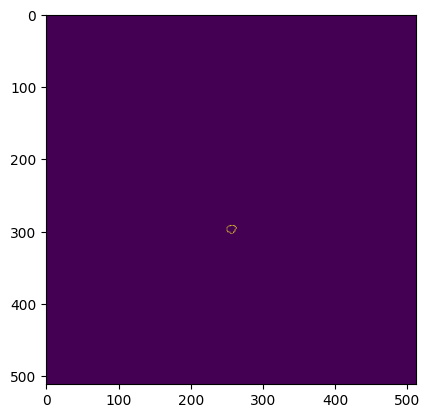

In [35]:
# plt.imshow(example['slice'])
plt.imshow(example['object'])